# Exercise 6: More plotting options

In this homework, you'll practice more advanced plotting options from `ggplot`.

Just like the prior homework, we will be using the [gapminder](https://cran.r-project.org/web/packages/gapminder/index.html) dataset. It contains  information about population, life expectancy and per capita GDP by country over time.

---
# 1. Multipanel figures (7 points)

Last week, we visualized the change in life expectancy over time for every country in one plot. An alternative method is to use facet panels to split each country into its own plot.

To start, load the `gapminder` dataset from the last set of exercises, as well as the `tidyverse`.

In [1]:
install.packages("gapminder")
library(gapminder)
head(gapminder) #see first 6 rows of data
install.packages("tidyverse")
library(tidyverse)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Afghanistan,Asia,1952,28.801,8425333,779.4453
Afghanistan,Asia,1957,30.332,9240934,820.8530
Afghanistan,Asia,1962,31.997,10267083,853.1007
Afghanistan,Asia,1967,34.020,11537966,836.1971
Afghanistan,Asia,1972,36.088,13079460,739.9811
Afghanistan,Asia,1977,38.438,14880372,786.1134


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.1     ✔ purrr   1.0.1
✔ tibble  3.1.8     ✔ dplyr   1.1.0
✔ tidyr   1.3.0     ✔ stringr 1.4.1
✔ readr   2.1.4     ✔ forcats 1.0.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Next, create a subset of data that only includes the 25 countries from the `Americas` continent. Now we can add a `facet_wrap` layer to our line plot to create the panels by country. Additionally, to make the x-axis values easier to read, add a `theme` layer to rotate the text by 45 degrees.

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Argentina,Americas,1952,62.485,17876956,5911.315
Argentina,Americas,1957,64.399,19610538,6856.856
Argentina,Americas,1962,65.142,21283783,7133.166
Argentina,Americas,1967,65.634,22934225,8052.953
Argentina,Americas,1972,67.065,24779799,9443.039
Argentina,Americas,1977,68.481,26983828,10079.027


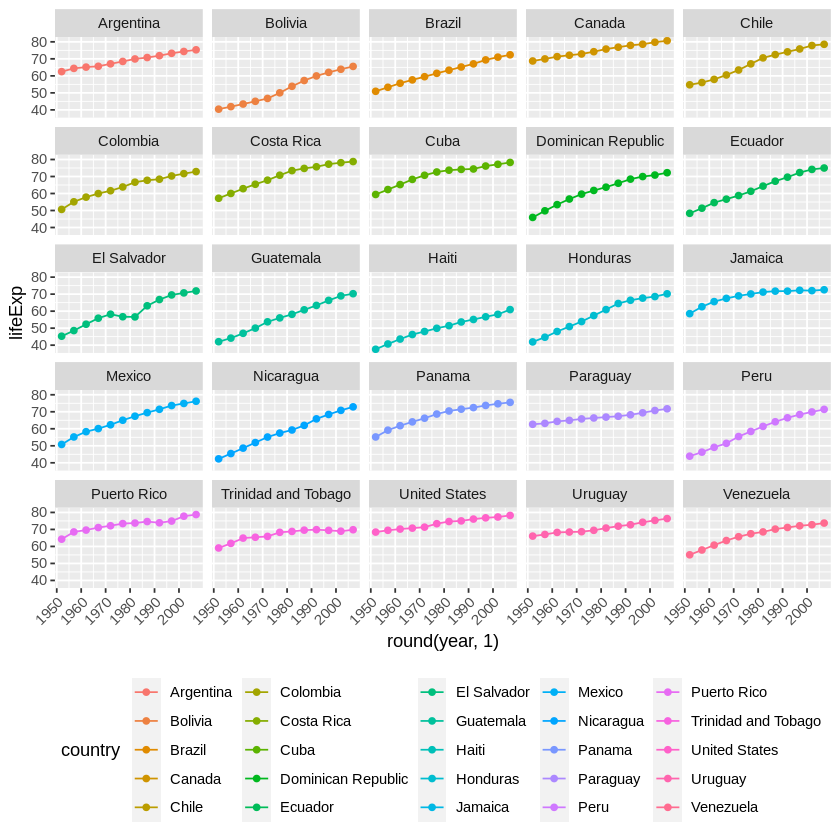

In [2]:
# subset data
gapminder %>% 
  filter(continent == 'Americas') -> Americas_only
head(Americas_only) #double check subsetting

# facet_wrap and rotate x-axis values
ggplot(Americas_only, aes(x=round(year,1), y=lifeExp, color=country)) +
  geom_line() +
  geom_point() + 
  facet_wrap(~ country, ncol = 5) +
  theme(legend.position="bottom") +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1))

Imagine that we wanted to publish this figure in a manuscript. Make the following changes to the code from the previous question to create a cleaner figure:

* Change the y-axis label (using `labs` layer)
* Add a figure title (using `labs` layer)
* Add a legend (using `labs` layer)
* Rotate x-axis value text to 90 degrees

*Hint: legend titles are set using the same names used in the aes specification. So, we need to add a `color` aes mapping to the global plot definition and reference this in the `labs` layer to specify the legend name.*

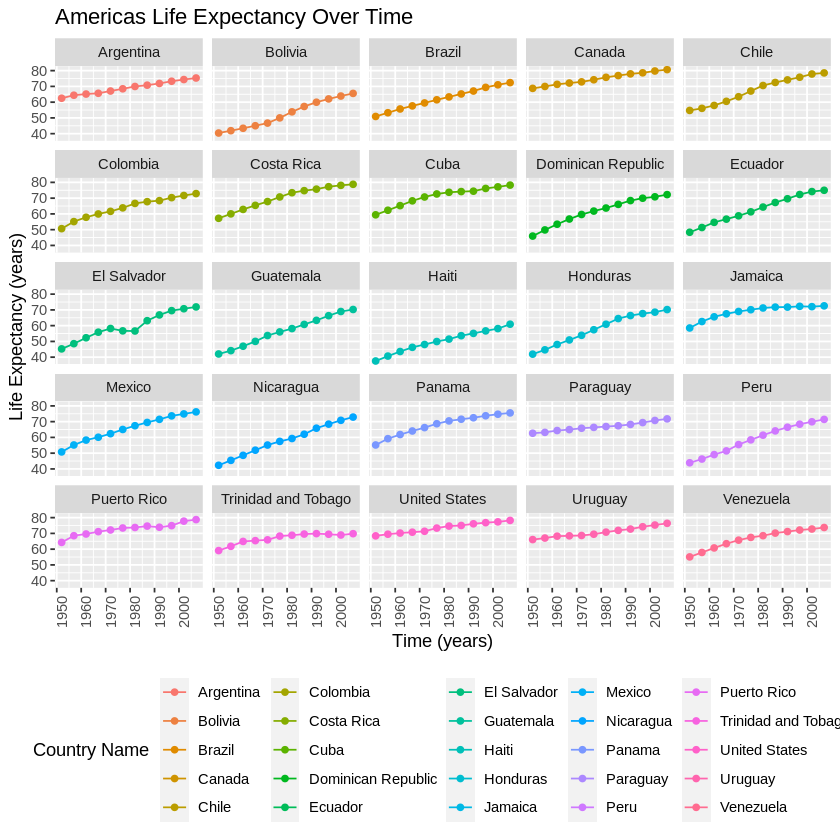

In [ ]:
# aabel y-axis, x-axis, and title; add legend and move to bottom of figure; rotate x-axis text to 90 degrees 
ggplot(Americas_only, aes(x=round(year,1), y=lifeExp, color=country)) +
  geom_line() +
  geom_point() + 
  facet_wrap(~ country, ncol = 5) +
  theme(legend.position="bottom") +
  theme(axis.text.x = element_text(angle = 90, vjust = 1, hjust=1)) +
  labs(y = "Life Expectancy (years)",x = "Time (years)", title ='Americas Life Expectancy Over Time',color='Country Name')

Now let's look at how life expectancy varies by continent over time. Create a multipanel figure where each panel contains five boxplots (one for each continent) and each panel represents one year of data. Include a legend instead of x-axis title and labels.

*Hint: the `theme` layer allows you to set attributes as `element_blank()`.*

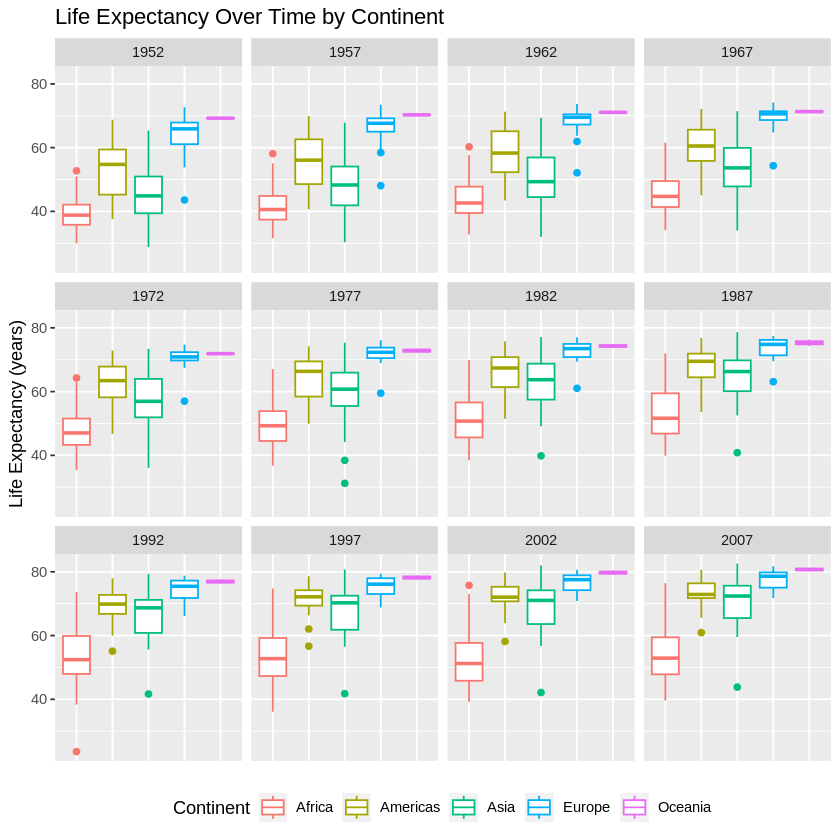

In [ ]:
# looking at life expectancy by continent over time
# 12 panels for 12 years; 5 boxplots per panel, 1 boxplot for each continent
ggplot(gapminder, aes(x=continent, y=lifeExp, color=continent)) +
  geom_boxplot() + 
  facet_wrap(~ year, ncol = 4) +
  theme(legend.position="bottom") +
  theme(axis.title.x=element_blank(), axis.text.x=element_blank(),axis.ticks.x=element_blank()) +
  labs(y = "Life Expectancy (years)",title ='Life Expectancy Over Time by Continent',color='Continent')
# save as gap_plot for playing with themes
gap_plot <- (ggplot(gapminder, aes(x=continent, y=lifeExp, color=continent)) +
  geom_boxplot() + 
  facet_wrap(~ year, ncol = 4) +
  theme(legend.position="bottom") +
  theme(axis.title.x=element_blank(), axis.text.x=element_blank(),axis.ticks.x=element_blank()) +
  labs(y = "Life Expectancy (years)",title ='Life Expectancy Over Time by Continent',color='Continent'))

---
# 2. Increasing data density (3 pts)

The above plots have nice readability, but they probably use more ink than is necessary. Take your boxplots from the last question and edit them to improve the data-to-ink ratio.

Hint: Double check your axis labels!

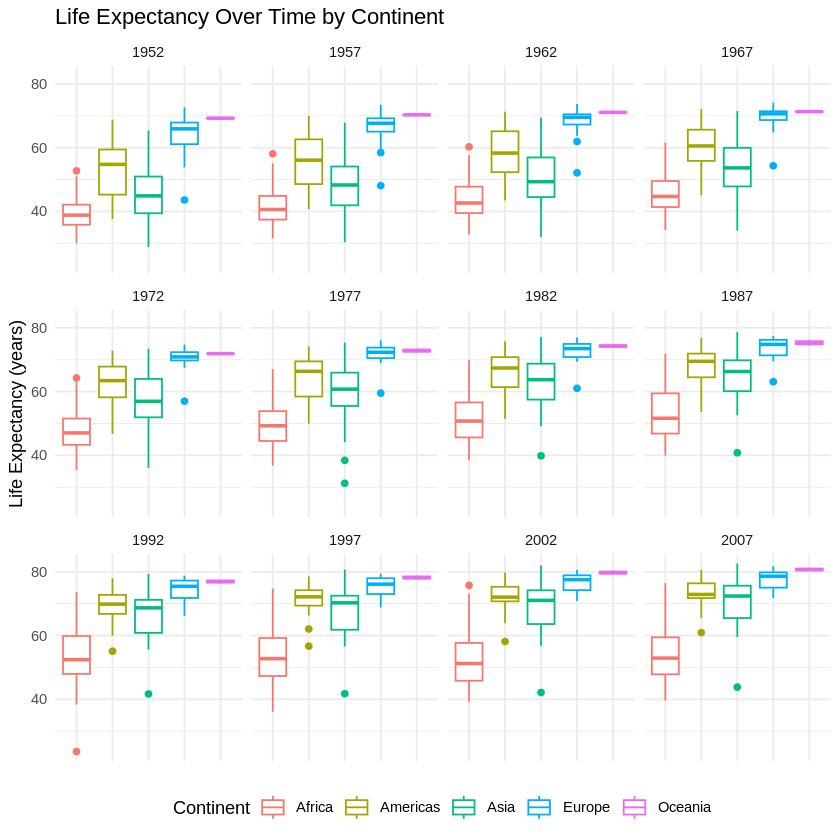

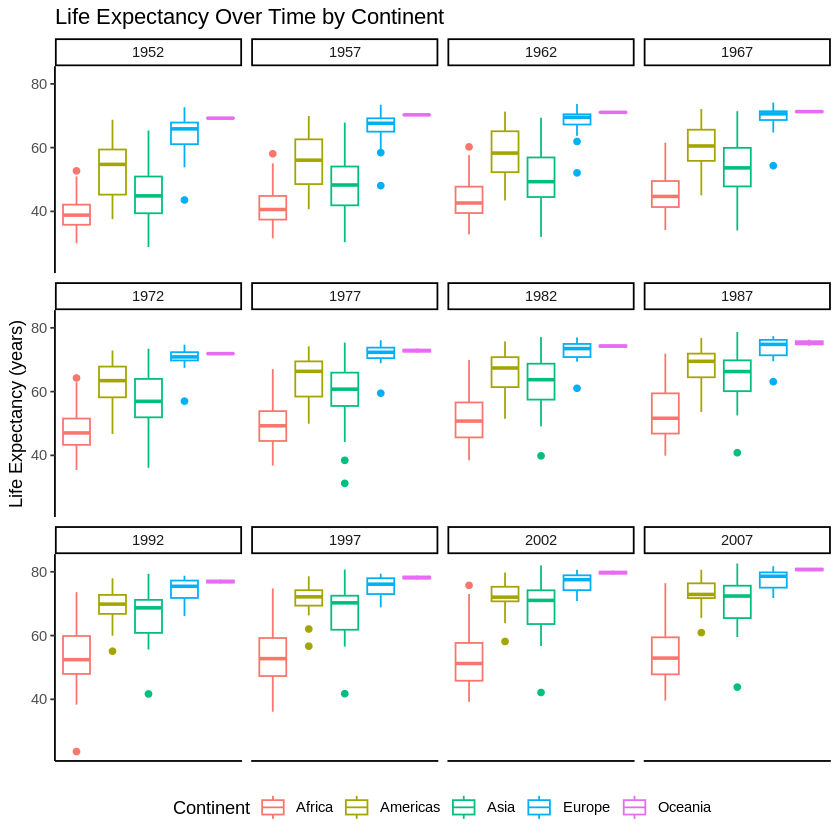

In [ ]:
gap_plot + 
  theme_minimal() +
  theme(legend.position="bottom") +
  theme(axis.title.x=element_blank(), axis.text.x=element_blank(),axis.ticks.x=element_blank())
# OR
gap_plot + 
  theme_classic() +
  theme(legend.position="bottom") +
  theme(axis.title.x=element_blank(), axis.text.x=element_blank(),axis.ticks.x=element_blank())
# I like both so I included both theme_minimal and theme_classic :)

**DUE:** 5pm EST, Feb 20, 2023

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here. 
> *Someone's Name*